## Introduction:

#### Context:

LEGO is a popular brand of toy building bricks. They are often sold in sets in order to build a specific object. Each set contains a number of parts in different shapes, sizes and colors. This database contains information on which parts are included in different LEGO sets. It was originally compiled to help people who owned some LEGO sets already figure out what other sets they could build with the pieces they had

#### Content:
This dataset contains the LEGO Parts/Sets/Colors and Inventories of every official LEGO set in the Rebrickable database. These files are current as of July 2017.

#### Acknowledgements:
This dataset was compiled by Rebrickable, which is a website to help identify what LEGO sets can be built given bricks and pieces from other LEGO sets and made available on Kaggle at the following [link](https://www.kaggle.com/datasets/rtatman/lego-database). 

#### Dataset Description:

The dataset contains 8 tables that are linked to each other through one or more relationships per the following schema:

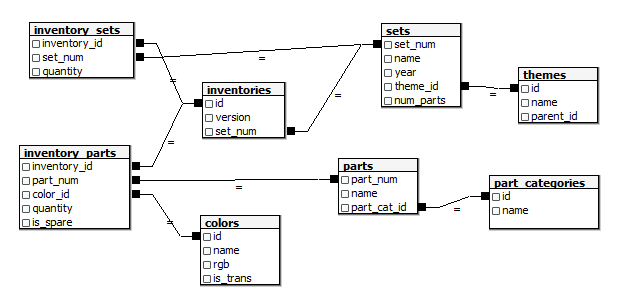



## Data Import:

In [1]:
#importing libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [2]:
parts_df = pd.read_csv('../5. Python - pandas - Data Manipulation/data/parts.csv')
inv_parts_df = pd.read_csv('../5. Python - pandas - Data Manipulation/data/inventory_parts.csv')
inv_df = pd.read_csv('../5. Python - pandas - Data Manipulation/data/inventories.csv')
colors_df = pd.read_csv('../5. Python - pandas - Data Manipulation/data/colors.csv')
part_cat_df = pd.read_csv('../5. Python - pandas - Data Manipulation/data/part_categories.csv')

In [3]:
#implementing matplotlib style to conform with Tableau coloring style
plt.style.use('tableau-colorblind10')

#create function to add data label to horizontal bar chart
def addlabelh(y, font_size):
    for i in range(len(y)):
        plt.text(y[i], i, y[i], ha = 'left', va = 'center_baseline', fontsize = font_size)

#create function to add data label to vertical bar chart    
def addlabel(x, font_size):
    for i in range(len(x)):
        plt.text(i, x[i], x[i], ha = 'center', va = 'bottom', fontsize = font_size)
        
#create function to graph bar charts
def barchart(x:list, y:list, title: str):

    # Normalize the data values to range [0, 1]
    normalized_values = (y - np.min(y)) / (np.max(y) - np.min(y))

    #Create a custom colormap with a gradient from lightest to darkest
    cmap = mcolors.LinearSegmentedColormap.from_list('custom_cmap', ['lightblue', 'darkblue'])

    #Graph
    plt.figure(figsize = (20,10))
    plt.bar(x, y, color = cmap(normalized_values))
    addlabel(y, 12)
    plt.title(title, fontsize = 16)

        #Rotate the x axis label for readability
    plt.xticks(rotation = 35, ha = 'right', fontsize = 14)

        #Remove the y axis label
    plt.yticks([])

    plt. show()
    
#create function to graph horizontal bar charts
def barhchart(x:list, y:list, title: str, figwidth: int, figheight: int, labelsize: int, font_size:int):

    # Normalize the data values to range [0, 1]
    normalized_values = (y - np.min(y)) / (np.max(y) - np.min(y))

    #Create a custom colormap with a gradient from lightest to darkest
    cmap = mcolors.LinearSegmentedColormap.from_list('custom_cmap', ['lightblue', 'darkblue'])

    #Graph
    plt.figure(figsize = (figwidth,figheight))
    plt.barh(x, y, color = cmap(normalized_values))
    addlabelh(y, labelsize)
    plt.title(title, fontsize = font_size)

        #Rotate the x axis label for readability
    plt.yticks( ha = 'right', fontsize = 14)

        #Remove the y axis label
    #plt.yticks([])

    plt. show()

## Data Exploration:

Parts Analysis:
1. What are the top 10 most stocked parts in the parts inventory?
2. How many colors are there across all LEGO parts?
3. What are the top 5 most stocked colors in the parts inventory?
4. What is the distribution of part categories in the dataset?

### Parts Analysis:

To start, I will explore the `parts` and `inventory_parts` tables first.

In [4]:
display(parts_df.head())
display(inv_parts_df.head())

,part_num,name,part_cat_id
0,0687b1,Set 0687 Activity Booklet 1,17
1,0901,Baseplate 16 x 30 with Set 080 Yellow House Print,1
2,0902,Baseplate 16 x 24 with Set 080 Small White Hou...,1
3,0903,Baseplate 16 x 24 with Set 080 Red House Print,1
4,0904,Baseplate 16 x 24 with Set 080 Large White Hou...,1


,inventory_id,part_num,color_id,quantity,is_spare
0,1,48379c01,72,1,f
1,1,48395,7,1,f
2,1,mcsport6,25,1,f
3,1,paddle,0,1,f
4,3,11816pr0005,78,1,f


Now we inspect the numeric values of these 2 tables to see if there are any unsual values.

In [5]:
display(parts_df.describe())
display(inv_parts_df.describe())

,part_cat_id
count,25993.000000
mean,19.491825
std,12.314862
min,1.000000
25%,13.000000
50%,13.000000
75%,27.000000
max,57.000000


,inventory_id,color_id,quantity
count,580251.000000,580251.000000,580251.000000
mean,8605.285444,78.472787,3.324730
std,4958.375522,622.238597,8.229816
min,1.000000,-1.000000,1.000000
25%,4352.000000,1.000000,1.000000
50%,8635.000000,15.000000,2.000000
75%,12794.000000,71.000000,4.000000
max,18708.000000,9999.000000,1440.000000


The different IDs look normal for the most part, except for `corlor_id` where we have a negative value. IDs shouldn't be negative? 
More importantly, the `quantity` field seems to have positive values which is good.

In [6]:
plt.style.use('tableau-colorblind10')

unique_parts = parts_df['part_num'].nunique()
stocked_unique_parts = inv_parts_df[inv_parts_df['quantity'] > 0]['part_num'].nunique()
pct_parts_stocked = round(stocked_unique_parts/unique_parts*100)

#There are XX total parts in the database (count of part_num)
print('There are {} unique parts in the database.'.format(unique_parts))

#There are YY total parts that are stocked (more than 0 quantity)
print('There are {} unique parts that are stocked in the database.'.format(stocked_unique_parts))

#Percentage of parts stocked
print('The number of parts that are stocked accounts for {}% of total unique parts.'.format(pct_parts_stocked))

There are 25993 unique parts in the database.
There are 23131 unique parts that are stocked in the database.
The number of parts that are stocked accounts for 89% of total unique parts.


##### 1. What are the top 10 most stocked parts in the parts inventory?

In [7]:
inv_parts_df.sort_values('quantity', ascending = False).head(10)

,inventory_id,part_num,color_id,quantity,is_spare
492590,14469,3024,15,1440,f
499547,14686,3024,15,1170,f
576725,18438,3024,0,900,f
576726,18438,3024,15,900,f
576728,18438,3024,71,900,f
576724,18438,3024,72,900,f
576727,18438,3024,14,900,f
17480,496,3024,15,810,f
305333,9065,3023,320,771,f
260546,7791,2780,0,724,f


We see an interesting trend that `part_num` 3024 seems to be the most stocked part in the parts inventory, but there are some variation to this part (different inventory_id but the same color_id, same inventory_id but different color_id). 

We get the part about the different color_id's, but let's see why there are different inventory_id's. This can be done by joining the `inventory_parts` table with the `invetory`, `parts` and `colors` tables. 

In [8]:
#bringing in information on the inventory table
inv_part_joined = inv_parts_df.merge(inv_df, how = 'left', left_on = 'inventory_id', right_on = 'id', suffixes = ('_inv_part', '_inv'))
inv_part_joined = inv_part_joined.drop(['is_spare', 'id'], axis = 1)
display(inv_part_joined.head())

,inventory_id,part_num,color_id,quantity,version,set_num
0,1,48379c01,72,1,1,7922-1
1,1,48395,7,1,1,7922-1
2,1,mcsport6,25,1,1,7922-1
3,1,paddle,0,1,1,7922-1
4,3,11816pr0005,78,1,1,3931-1


In [9]:
#bringing in information on the parts table
inv_part_joined = inv_part_joined.merge(parts_df, how = 'left', left_on = 'part_num', right_on = 'part_num', suffixes = ('_inv_part', '_part'))
display(inv_part_joined)

,inventory_id,part_num,color_id,quantity,version,set_num,name,part_cat_id
0,1,48379c01,72,1,1,7922-1,Sports Promo Figure Base with Feet,27.0
1,1,48395,7,1,1,7922-1,Sports Promo Snowboard from McDonald's Sports ...,27.0
2,1,mcsport6,25,1,1,7922-1,Sports Promo Figure Head Torso Assembly McDona...,13.0
3,1,paddle,0,1,1,7922-1,Sports Promo Paddle from McDonald's Sports Sets,27.0
4,3,11816pr0005,78,1,1,3931-1,"Minifig Head Modified - Friends - Green Eyes, ...",13.0
...,...,...,...,...,...,...,...,...
580246,18708,99206,0,3,1,75090-2,Plate Special 2 x 2 x 0.667 with Two Studs On ...,9.0
580247,18708,99207,71,4,1,75090-2,Bracket 1 x 2 - 2 x 2 Inverted,9.0
580248,18708,99780,15,4,1,75090-2,Bracket 1 x 2 - 1 x 2 Inverted,9.0
580249,18708,99780,0,9,1,75090-2,Bracket 1 x 2 - 1 x 2 Inverted,9.0


In [10]:
#bringing in information on the colors table
inv_part_joined = inv_part_joined.merge(colors_df, how = 'left', left_on = 'color_id', right_on = 'id', suffixes = ('_inv_parts', '_colors'))
inv_part_joined = inv_part_joined.drop(['id', 'is_trans'], axis = 1)
display(inv_part_joined)

,inventory_id,part_num,color_id,quantity,version,set_num,name_inv_parts,part_cat_id,name_colors,rgb
0,1,48379c01,72,1,1,7922-1,Sports Promo Figure Base with Feet,27.0,Dark Bluish Gray,6C6E68
1,1,48395,7,1,1,7922-1,Sports Promo Snowboard from McDonald's Sports ...,27.0,Light Gray,9BA19D
2,1,mcsport6,25,1,1,7922-1,Sports Promo Figure Head Torso Assembly McDona...,13.0,Orange,FE8A18
3,1,paddle,0,1,1,7922-1,Sports Promo Paddle from McDonald's Sports Sets,27.0,Black,05131D
4,3,11816pr0005,78,1,1,3931-1,"Minifig Head Modified - Friends - Green Eyes, ...",13.0,Light Flesh,F6D7B3
...,...,...,...,...,...,...,...,...,...,...
580246,18708,99206,0,3,1,75090-2,Plate Special 2 x 2 x 0.667 with Two Studs On ...,9.0,Black,05131D
580247,18708,99207,71,4,1,75090-2,Bracket 1 x 2 - 2 x 2 Inverted,9.0,Light Bluish Gray,A0A5A9
580248,18708,99780,15,4,1,75090-2,Bracket 1 x 2 - 1 x 2 Inverted,9.0,White,FFFFFF
580249,18708,99780,0,9,1,75090-2,Bracket 1 x 2 - 1 x 2 Inverted,9.0,Black,05131D


After joining tables, we now inspect the top 10 most stocked parts again.

In [11]:
inv_part_joined.sort_values('quantity', ascending = False).head(10)

,inventory_id,part_num,color_id,quantity,version,set_num,name_inv_parts,part_cat_id,name_colors,rgb
492590,14469,3024,15,1440,1,k34432-1,Plate 1 x 1,14.0,White,FFFFFF
499547,14686,3024,15,1170,1,k34433-1,Plate 1 x 1,14.0,White,FFFFFF
576725,18438,3024,0,900,1,40179-1,Plate 1 x 1,14.0,Black,05131D
576726,18438,3024,15,900,1,40179-1,Plate 1 x 1,14.0,White,FFFFFF
576728,18438,3024,71,900,1,40179-1,Plate 1 x 1,14.0,Light Bluish Gray,A0A5A9
576724,18438,3024,72,900,1,40179-1,Plate 1 x 1,14.0,Dark Bluish Gray,6C6E68
576727,18438,3024,14,900,1,40179-1,Plate 1 x 1,14.0,Yellow,F2CD37
17480,496,3024,15,810,1,k34434-1,Plate 1 x 1,14.0,White,FFFFFF
305333,9065,3023,320,771,1,21010-1,Plate 1 x 2,14.0,Dark Red,720E0F
260546,7791,2780,0,724,1,42055-1,Technic Pin with Friction Ridges Lengthwise an...,53.0,Black,05131D


We see that some that parts 3024 might have the same `part_num` and `color_id` but different `inventory_id` because they come from different LEGO sets, which is an interesting way of categorizing the parts. Assuming that I disregard the `inventory_id` and only want to look at parts that have unique `part_num` and `color_id`, what will be the top 10 most stocked parts? 

In [12]:
#Creating a pivot table to show quantity by part number and color 
inv_part_joined_pivot = pd.pivot_table(inv_part_joined, values = 'quantity', index = ['part_num', 'name_inv_parts', 'name_colors'], aggfunc = np.sum, fill_value = 0).reset_index()

In [13]:
combined_part_color = inv_part_joined_pivot.name_colors + ' ' + inv_part_joined_pivot.name_inv_parts
inv_part_joined_pivot['part_color_name'] = combined_part_color
inv_part_joined_pivot10 = inv_part_joined_pivot.sort_values('quantity', ascending = False).head(10)
#prepping value for the horizontal bar chart
inv_part_joined_pivot10 = inv_part_joined_pivot10.sort_values('quantity', ascending = True)

Now we visualize the top 10 values.

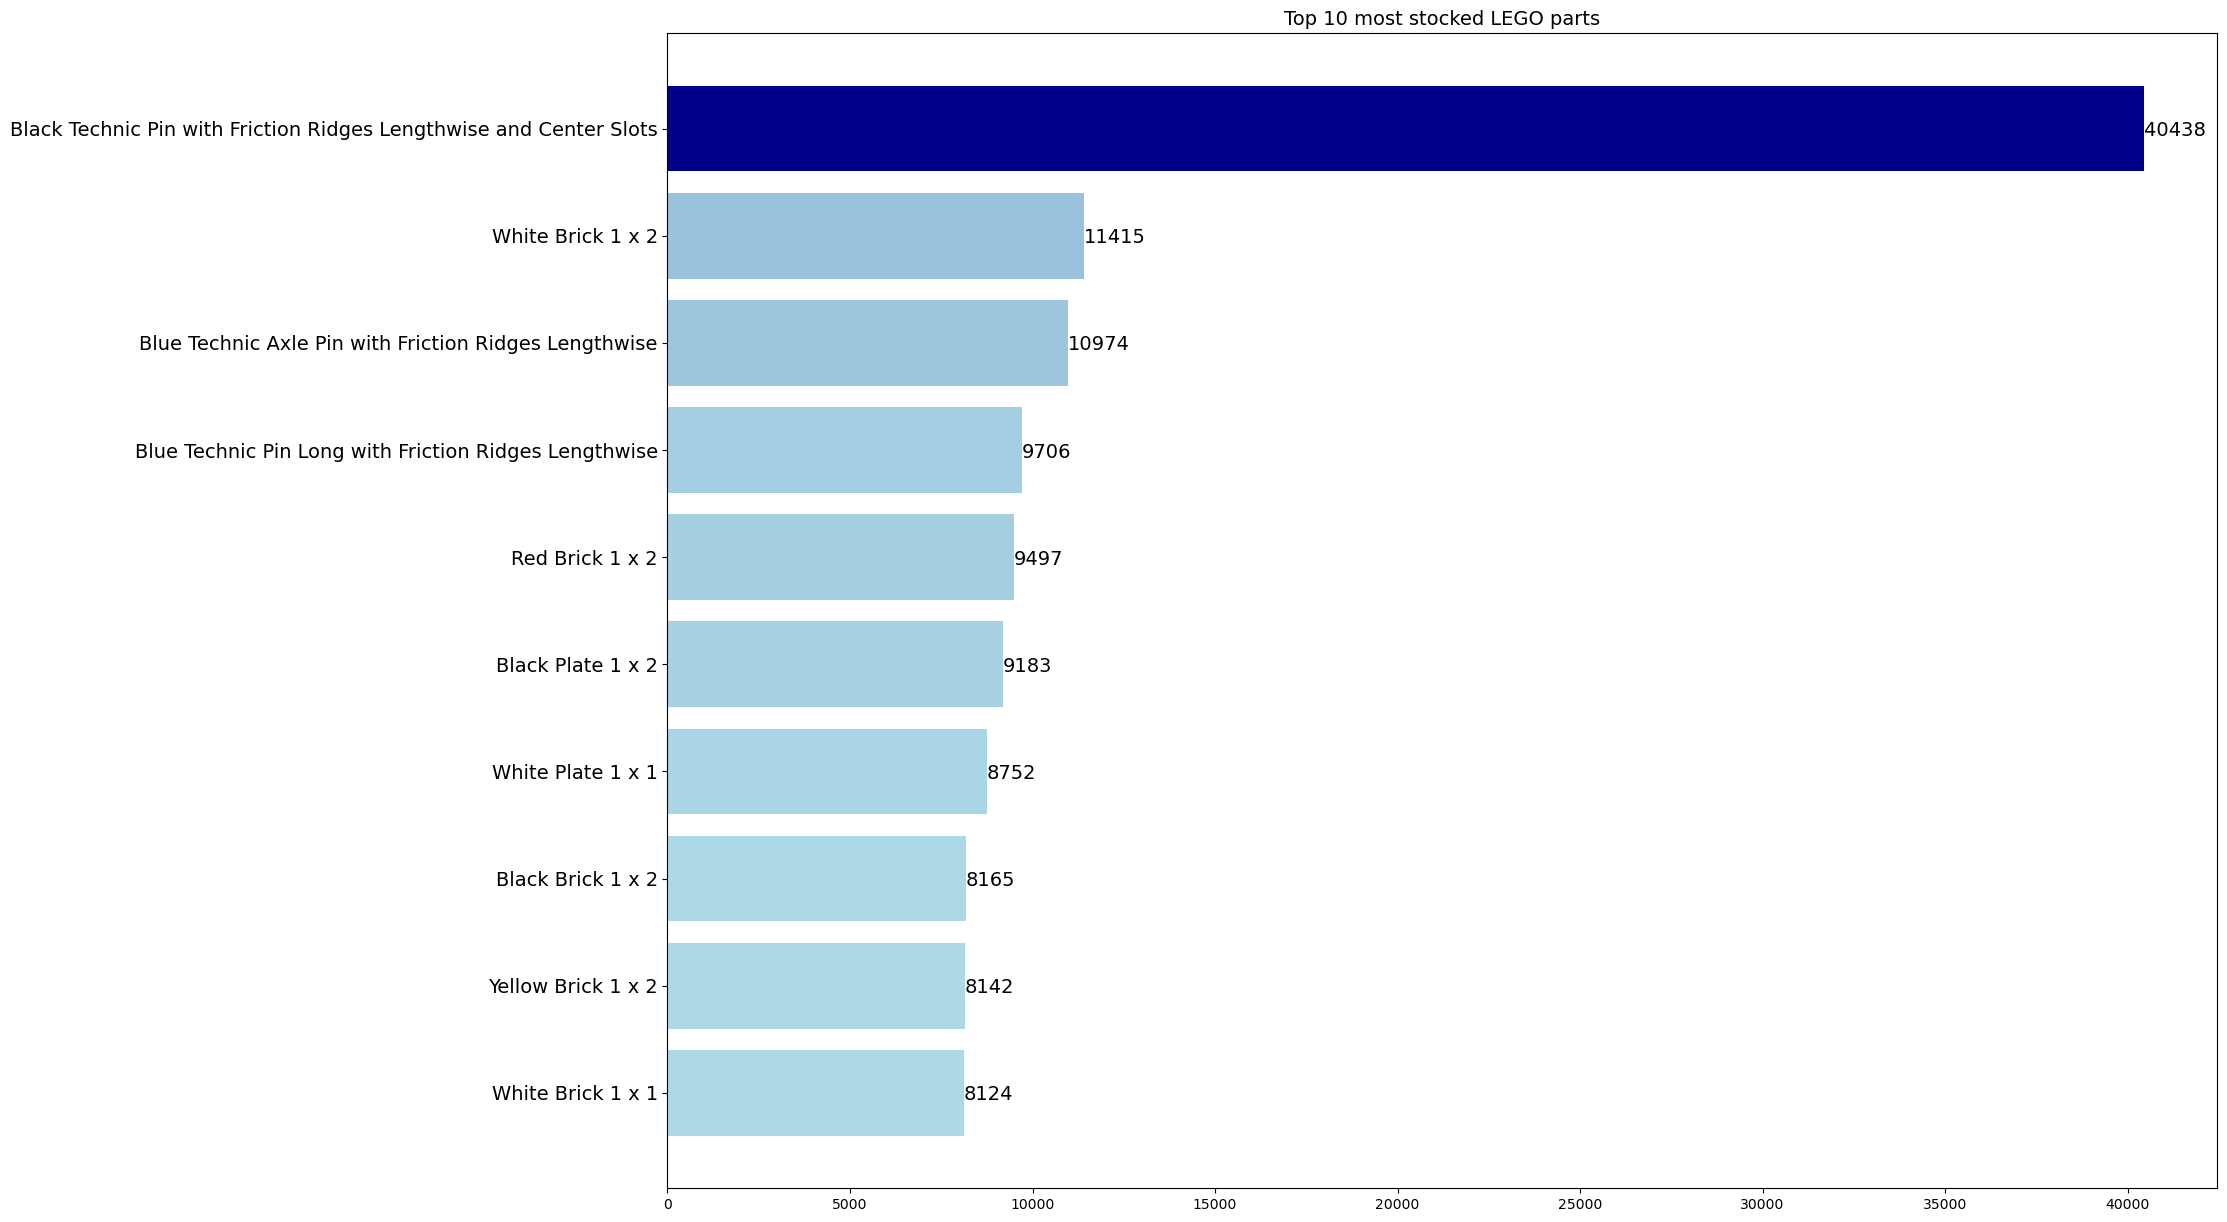

In [14]:
barhchart(list(inv_part_joined_pivot10.part_color_name), list(inv_part_joined_pivot10.quantity), 'Top 10 most stocked LEGO parts', figwidth = 20, figheight = 15, labelsize = 14, font_size = 14)

##### 2. How many colors are there across all LEGO parts?

We will look at the `colors` table for this question.

In [15]:
unique_colors = colors_df.name.nunique()
print('There are {} unique colors in the LEGO database.'.format(unique_colors))

There are 135 unique colors in the LEGO database.


Now we want to inspect this further, for example, perhaps there are many shades of blue?

In [16]:
blue_shades = colors_df.name[colors_df.name.str.contains('Blue')].nunique()
print('There are {} different blue shades in the LEGO database.'.format(blue_shades))

There are 19 different blue shades in the LEGO database.


We might want to now group the 135 different colors into groups of basic colors. We know for a fact that the color family is reflected in the last word of the color's name. So we can split the color's name last word to get that grouping.

In [17]:
#extract root color
root_color1 = colors_df.name.str.split().str[-1]

#to further extract some root colors that have hyphen like Black-Silver or Trans-Green
root_color2 = root_color1.str.split('-').str[-1] 

colors_df['root_color'] = root_color2

display(colors_df.head())
unique_root_color = colors_df.root_color.nunique()
print('There are {} root colors in the LEGO database.'.format(unique_root_color))

,id,name,rgb,is_trans,root_color
0,-1,Unknown,0033B2,f,Unknown
1,0,Black,05131D,f,Black
2,1,Blue,0055BF,f,Blue
3,2,Green,237841,f,Green
4,3,Dark Turquoise,008F9B,f,Turquoise


There are 33 root colors in the LEGO database.


In [18]:
#create a pivot table to have a better view of the color values

root_color_pivot = pd.pivot_table(colors_df, values = 'id', index = ['root_color'], aggfunc = 'count', fill_value = 0).reset_index()
root_color_pivot = root_color_pivot.rename(columns = {'id':'shade_count'})
root_color_pivot = root_color_pivot.loc[root_color_pivot.root_color != 'Color]']
root_color_pivot = root_color_pivot.sort_values('shade_count', ascending = False)

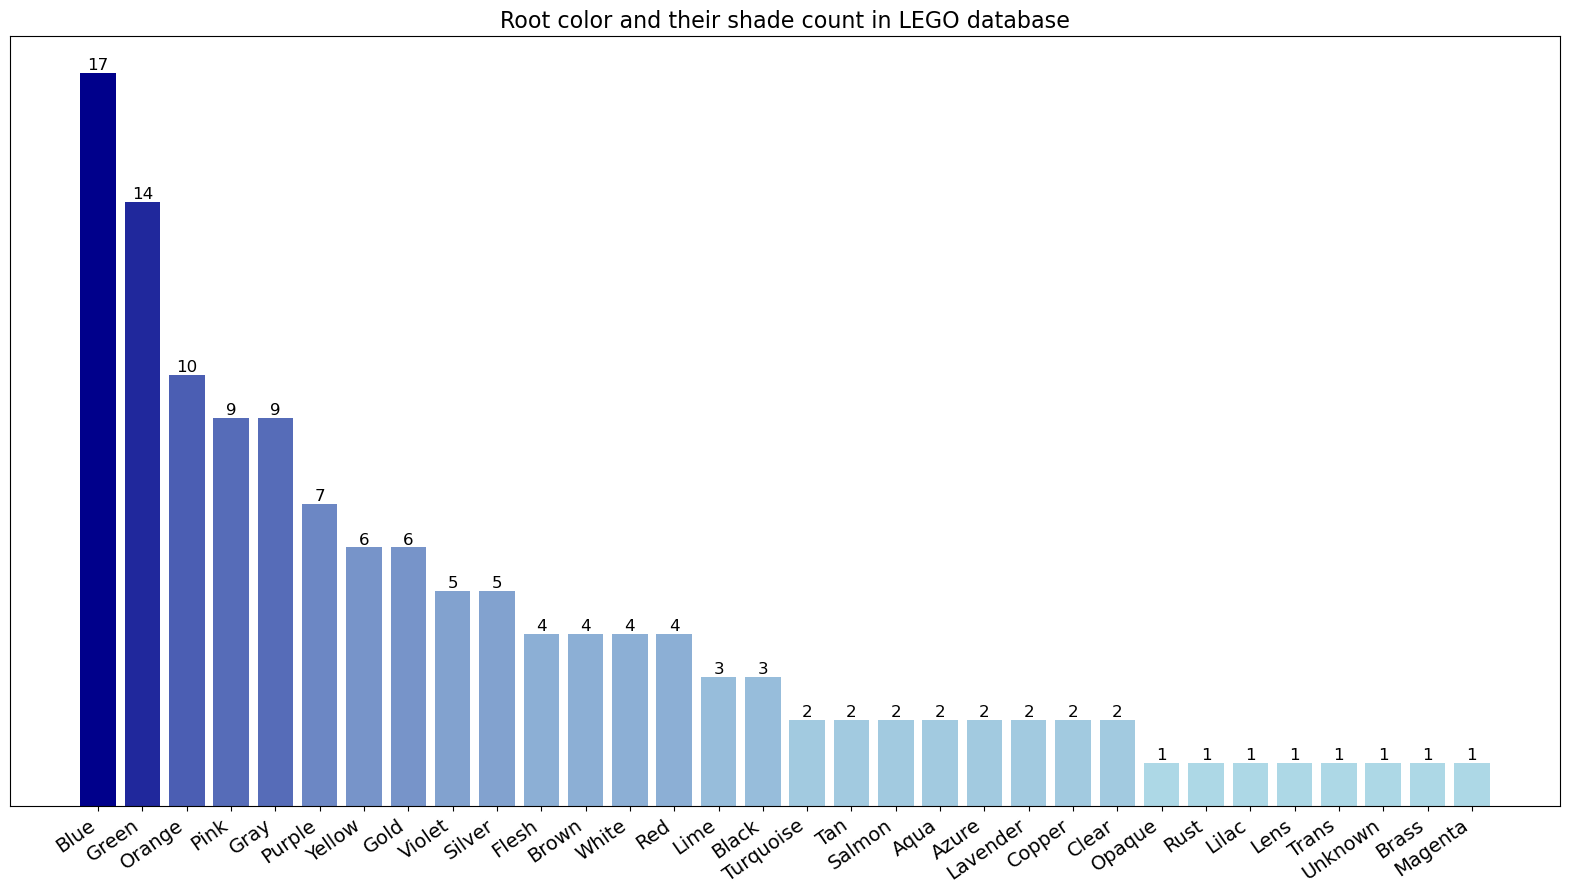

In [19]:
barchart(list(root_color_pivot.root_color), list(root_color_pivot.shade_count), 'Root color and their shade count in LEGO database')

So we see that blue, green and orange are the three colors that have the most shades in the LEGO database.

##### 3. What are the top 5 most stocked colors in the parts inventory?


In [20]:
inv_part_joined.head()

,inventory_id,part_num,color_id,quantity,version,set_num,name_inv_parts,part_cat_id,name_colors,rgb
0,1,48379c01,72,1,1,7922-1,Sports Promo Figure Base with Feet,27.0,Dark Bluish Gray,6C6E68
1,1,48395,7,1,1,7922-1,Sports Promo Snowboard from McDonald's Sports ...,27.0,Light Gray,9BA19D
2,1,mcsport6,25,1,1,7922-1,Sports Promo Figure Head Torso Assembly McDona...,13.0,Orange,FE8A18
3,1,paddle,0,1,1,7922-1,Sports Promo Paddle from McDonald's Sports Sets,27.0,Black,05131D
4,3,11816pr0005,78,1,1,3931-1,"Minifig Head Modified - Friends - Green Eyes, ...",13.0,Light Flesh,F6D7B3


In [21]:
inv_part_joined_pivot_color = pd.pivot_table(inv_part_joined, values = 'quantity', index = ['name_colors'], aggfunc = np.sum, fill_value = 0).reset_index()
top5_stocked_color = inv_part_joined_pivot_color.sort_values('quantity', ascending = False).head(5)
top5_stocked_color

,name_colors,quantity
1,Black,396589
127,White,221570
49,Light Bluish Gray,201930
88,Red,169987
21,Dark Bluish Gray,148595


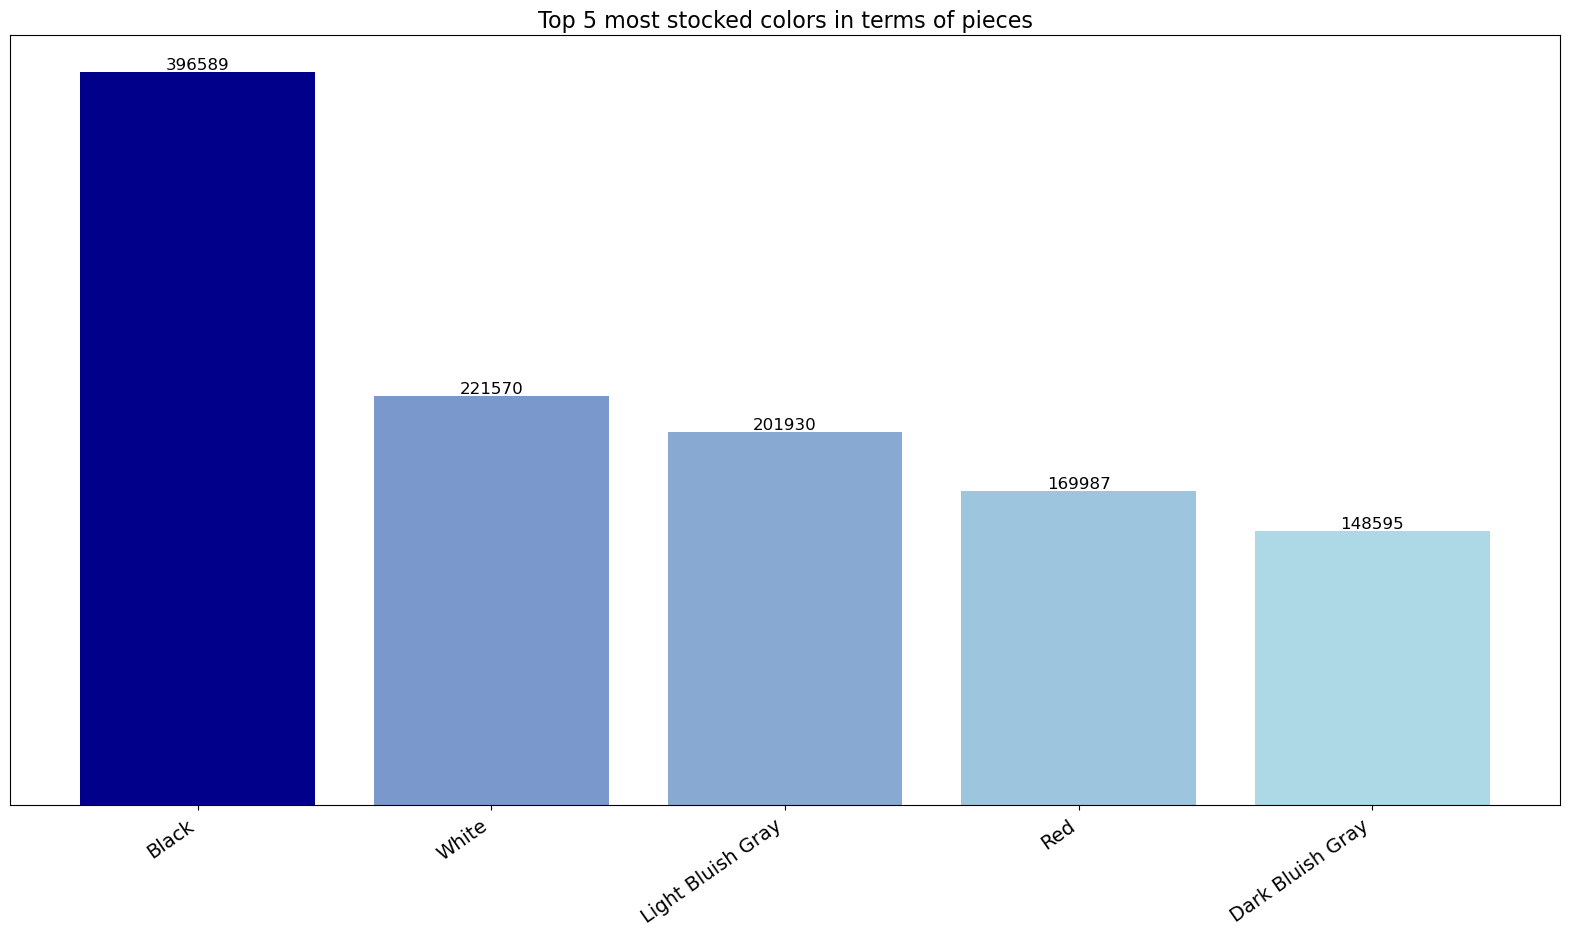

In [22]:
barchart(list(top5_stocked_color.name_colors), list(top5_stocked_color.quantity), 'Top 5 most stocked colors in terms of pieces')

In [23]:
#extract root color
root_color1 = inv_part_joined.name_colors.str.split().str[-1]

#to further extract some root colors that have hyphen like Black-Silver or Trans-Green
root_color2 = root_color1.str.split('-').str[-1] 

inv_part_joined['root_color'] = root_color2
inv_part_joined.head()

,inventory_id,part_num,color_id,quantity,version,set_num,name_inv_parts,part_cat_id,name_colors,rgb,root_color
0,1,48379c01,72,1,1,7922-1,Sports Promo Figure Base with Feet,27.0,Dark Bluish Gray,6C6E68,Gray
1,1,48395,7,1,1,7922-1,Sports Promo Snowboard from McDonald's Sports ...,27.0,Light Gray,9BA19D,Gray
2,1,mcsport6,25,1,1,7922-1,Sports Promo Figure Head Torso Assembly McDona...,13.0,Orange,FE8A18,Orange
3,1,paddle,0,1,1,7922-1,Sports Promo Paddle from McDonald's Sports Sets,27.0,Black,05131D,Black
4,3,11816pr0005,78,1,1,3931-1,"Minifig Head Modified - Friends - Green Eyes, ...",13.0,Light Flesh,F6D7B3,Flesh


In [24]:
inv_part_joined_pivot_root_color = pd.pivot_table(inv_part_joined, values = 'quantity', index = ['root_color'], aggfunc = np.sum, fill_value = 0).reset_index()
top5_stocked_root_color = inv_part_joined_pivot_root_color.sort_values('quantity', ascending = False).head(5)
top5_stocked_root_color

,root_color,quantity
11,Gray,469725
2,Black,402228
29,White,221976
20,Red,201513
3,Blue,162555


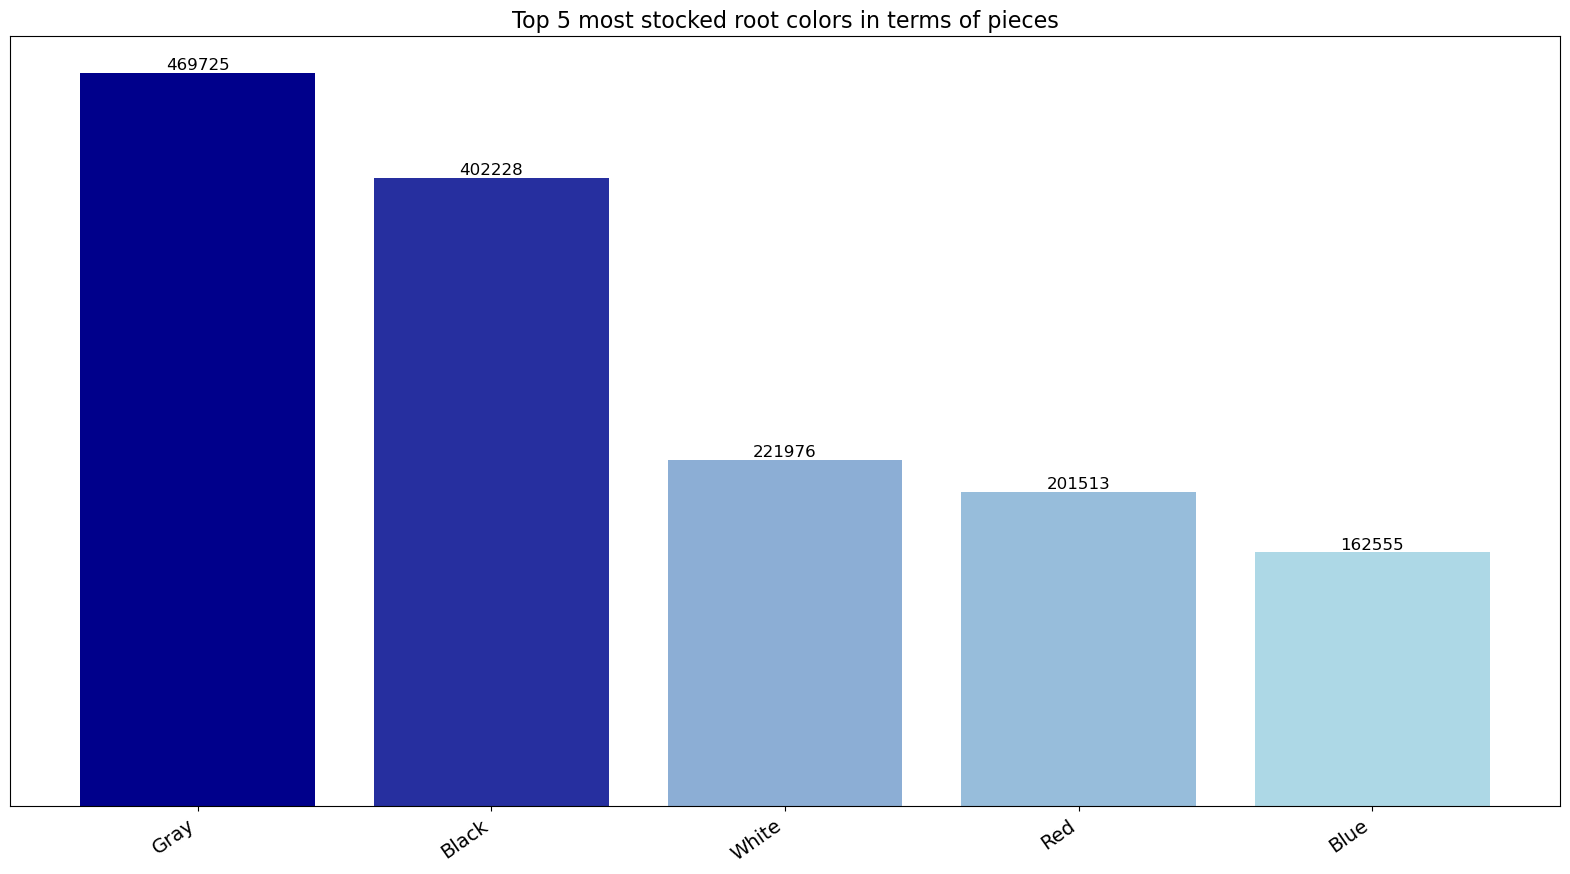

In [25]:
barchart(list(top5_stocked_root_color.root_color), list(top5_stocked_root_color.quantity), 'Top 5 most stocked root colors in terms of pieces')

##### 4. What is the distribution of part categories in terms of pieces in the inventory?

For this question, we'll look at the `inventory_parts` table for the quantity of each part, the `parts` table for the number and name of each part, and the `part_categories` table for the name of the category that each part belongs to.

In [26]:
#starting with the 'inventory_parts' table, bringing in information from the 'parts' table
inv_parts_joined = inv_parts_df.merge(parts_df, how = 'left', left_on = 'part_num', right_on = 'part_num', suffixes = ('_inv_part', '_parts'))
#inv_part_joined = inv_part_joined.drop(['is_spare', 'id'], axis = 1)
display(inv_parts_joined.head())

,inventory_id,part_num,color_id,quantity,is_spare,name,part_cat_id
0,1,48379c01,72,1,f,Sports Promo Figure Base with Feet,27.0
1,1,48395,7,1,f,Sports Promo Snowboard from McDonald's Sports ...,27.0
2,1,mcsport6,25,1,f,Sports Promo Figure Head Torso Assembly McDona...,13.0
3,1,paddle,0,1,f,Sports Promo Paddle from McDonald's Sports Sets,27.0
4,3,11816pr0005,78,1,f,"Minifig Head Modified - Friends - Green Eyes, ...",13.0


In [27]:
#bringing in the 'part_categories' table
inv_parts_categories_joined = inv_parts_joined.merge(part_cat_df, how = 'left', left_on = 'part_cat_id', right_on = 'id', suffixes = ('_inv_part', '_part_cat'))
display(inv_parts_categories_joined.head())

,inventory_id,part_num,color_id,quantity,is_spare,name_inv_part,part_cat_id,id,name_part_cat
0,1,48379c01,72,1,f,Sports Promo Figure Base with Feet,27.0,27.0,Minifig Accessories
1,1,48395,7,1,f,Sports Promo Snowboard from McDonald's Sports ...,27.0,27.0,Minifig Accessories
2,1,mcsport6,25,1,f,Sports Promo Figure Head Torso Assembly McDona...,13.0,13.0,Minifigs
3,1,paddle,0,1,f,Sports Promo Paddle from McDonald's Sports Sets,27.0,27.0,Minifig Accessories
4,3,11816pr0005,78,1,f,"Minifig Head Modified - Friends - Green Eyes, ...",13.0,13.0,Minifigs


In [28]:
#prepare the pivot table to graph the horizontal bar chart
inv_parts_categories_joined_pivot = pd.pivot_table(inv_parts_categories_joined, values = 'quantity', index = ['name_part_cat'], aggfunc = np.sum, fill_value = 0).reset_index()
inv_parts_categories_joined_pivot = inv_parts_categories_joined_pivot.sort_values('quantity', ascending = True)

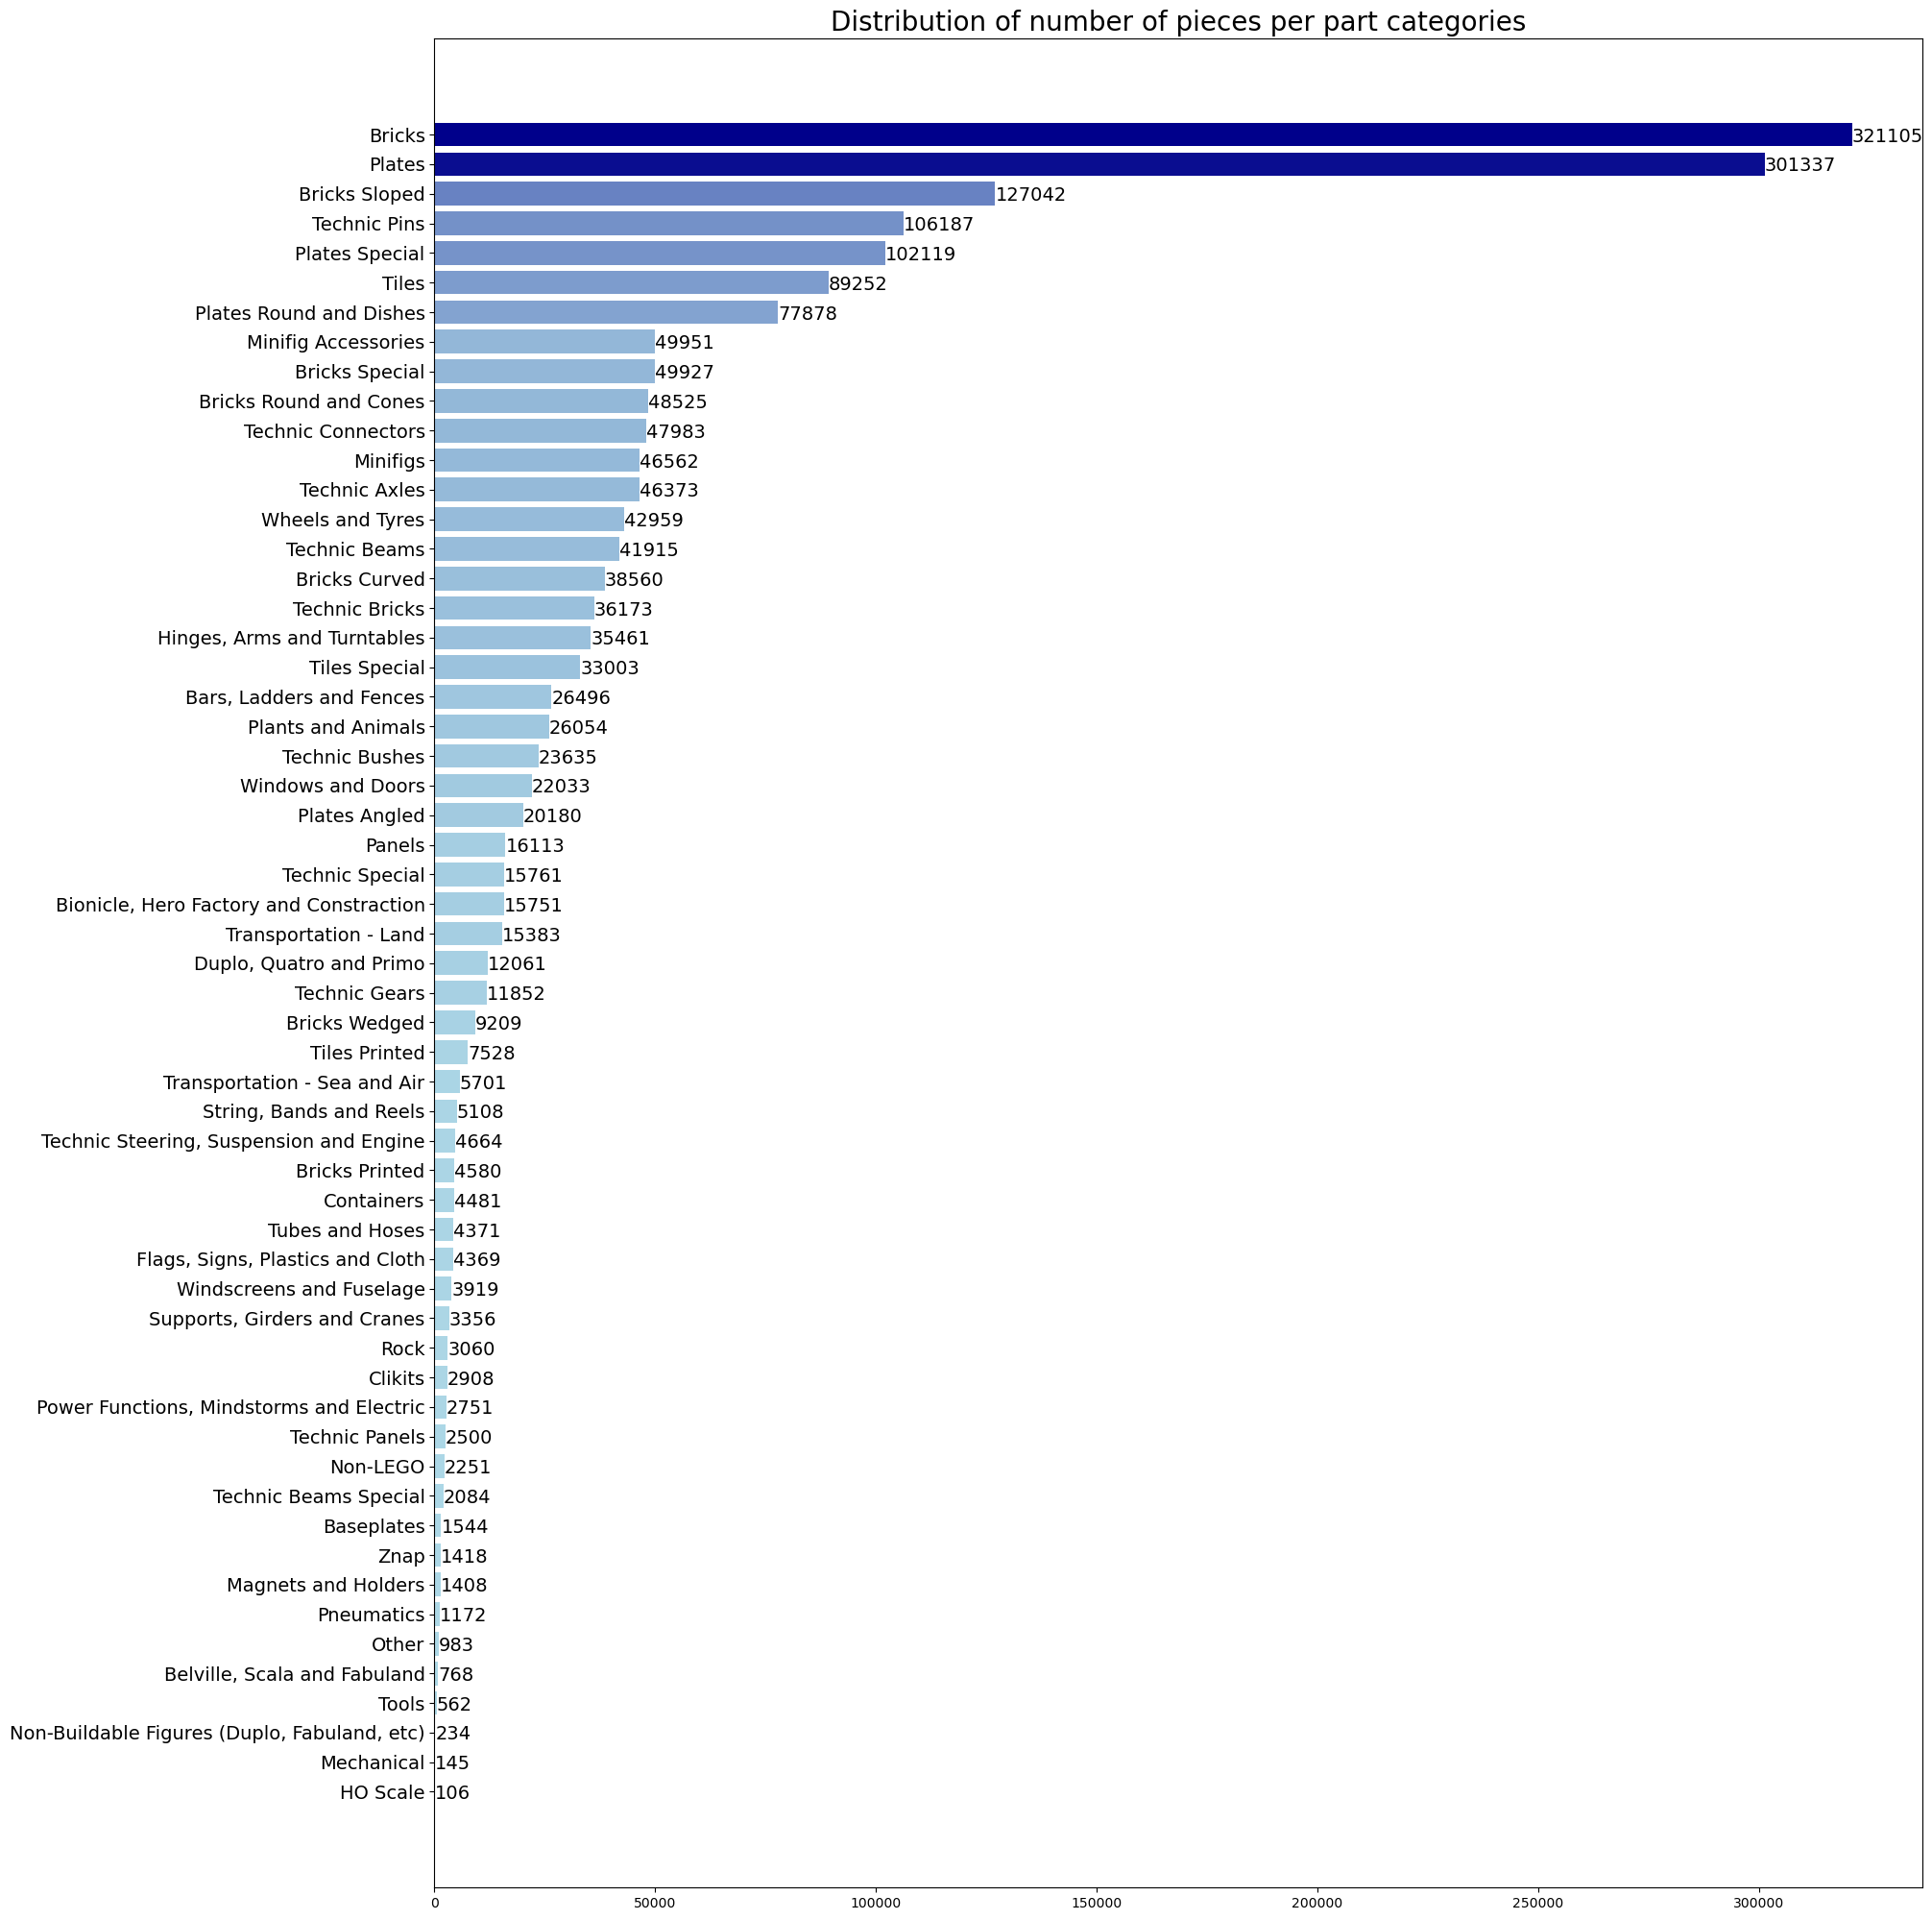

In [29]:
#graph horizontal bar chart
barhchart(list(inv_parts_categories_joined_pivot.name_part_cat), list(inv_parts_categories_joined_pivot.quantity), 'Distribution of number of pieces per part categories', figwidth = 20, figheight = 25, labelsize = 14, font_size = 20)

We see that bricks and plates are the most common part categories that are stocked in the inventory. 
Sloped bricks and technic pins are the 3rd and 4th most stocked part categories. These results are not surprising given how fundamental these parts are in building LEGO sets.